In [12]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.appName("vis").getOrCreate()


In [14]:
import pyspark
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris


In [15]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["species"] = iris.target
iris_spark_df = spark.createDataFrame(iris_data)

iris_spark_df.printSchema()

root
 |-- sepal length (cm): double (nullable = true)
 |-- sepal width (cm): double (nullable = true)
 |-- petal length (cm): double (nullable = true)
 |-- petal width (cm): double (nullable = true)
 |-- species: long (nullable = true)



In [16]:
iris_spark_df.show()

+-----------------+----------------+-----------------+----------------+-------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|species|
+-----------------+----------------+-----------------+----------------+-------+
|              5.1|             3.5|              1.4|             0.2|      0|
|              4.9|             3.0|              1.4|             0.2|      0|
|              4.7|             3.2|              1.3|             0.2|      0|
|              4.6|             3.1|              1.5|             0.2|      0|
|              5.0|             3.6|              1.4|             0.2|      0|
|              5.4|             3.9|              1.7|             0.4|      0|
|              4.6|             3.4|              1.4|             0.3|      0|
|              5.0|             3.4|              1.5|             0.2|      0|
|              4.4|             2.9|              1.4|             0.2|      0|
|              4.9|             3.1|    

In [17]:
iris_transformed = iris_spark_df.select(
    col("sepal length (cm)"),
    col("sepal width (cm)") +1
)

iris_transformed.show(5)

+-----------------+----------------------+
|sepal length (cm)|(sepal width (cm) + 1)|
+-----------------+----------------------+
|              5.1|                   4.5|
|              4.9|                   4.0|
|              4.7|                   4.2|
|              4.6|                   4.1|
|              5.0|                   4.6|
+-----------------+----------------------+
only showing top 5 rows



In [19]:
iris_filtered = iris_spark_df.filter(iris_spark_df["sepal length (cm)"] > 5.7)
iris_filtered.show()

+-----------------+----------------+-----------------+----------------+-------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|species|
+-----------------+----------------+-----------------+----------------+-------+
|              5.8|             4.0|              1.2|             0.2|      0|
|              7.0|             3.2|              4.7|             1.4|      1|
|              6.4|             3.2|              4.5|             1.5|      1|
|              6.9|             3.1|              4.9|             1.5|      1|
|              6.5|             2.8|              4.6|             1.5|      1|
|              6.3|             3.3|              4.7|             1.6|      1|
|              6.6|             2.9|              4.6|             1.3|      1|
|              5.9|             3.0|              4.2|             1.5|      1|
|              6.0|             2.2|              4.0|             1.0|      1|
|              6.1|             2.9|    

In [20]:
iris_aggregated = iris_spark_df.groupBy("species").agg(avg("sepal length (cm)").alias("average_sepal_length"))
iris_aggregated.show()

+-------+--------------------+
|species|average_sepal_length|
+-------+--------------------+
|      0|   5.005999999999999|
|      1|   5.935999999999999|
|      2|   6.588000000000001|
+-------+--------------------+



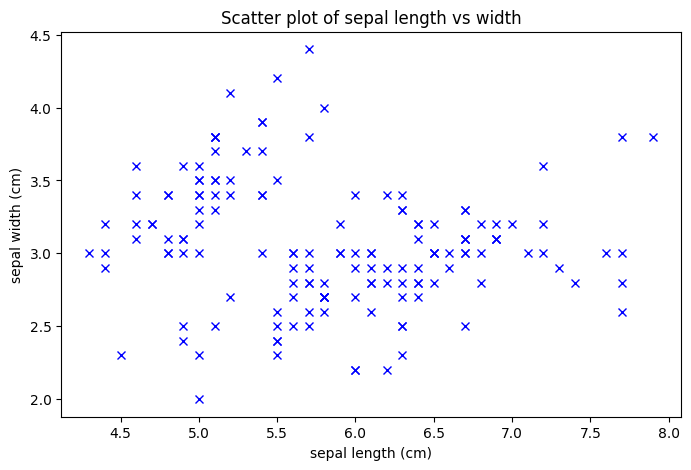

In [21]:
# Using matplotlib

plt.figure(figsize=(8, 5))
plt.plot(iris_data["sepal length (cm)"], iris_data["sepal width (cm)"], 'bx')
plt.title("Scatter plot of sepal length vs width")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.savefig("plot of sepal length vs width")
plt.show()

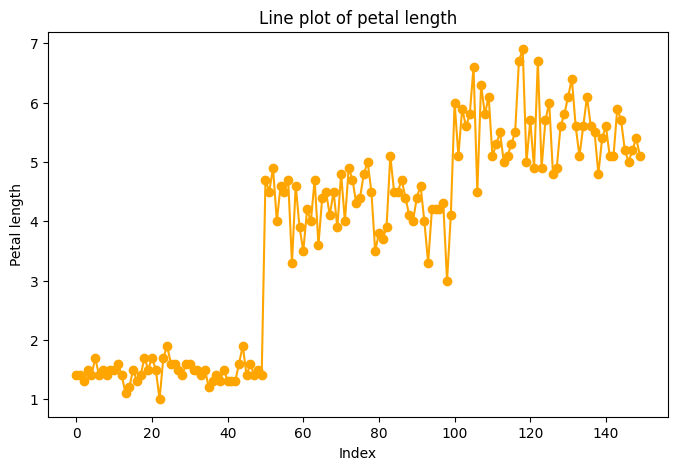

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(iris_data["petal length (cm)"], color='orange', marker='o')
plt.title('Line plot of petal length')
plt.xlabel('Index')
plt.ylabel('Petal length')
plt.show()

Text(0.5, 1.0, 'Petal Width Boxplot')

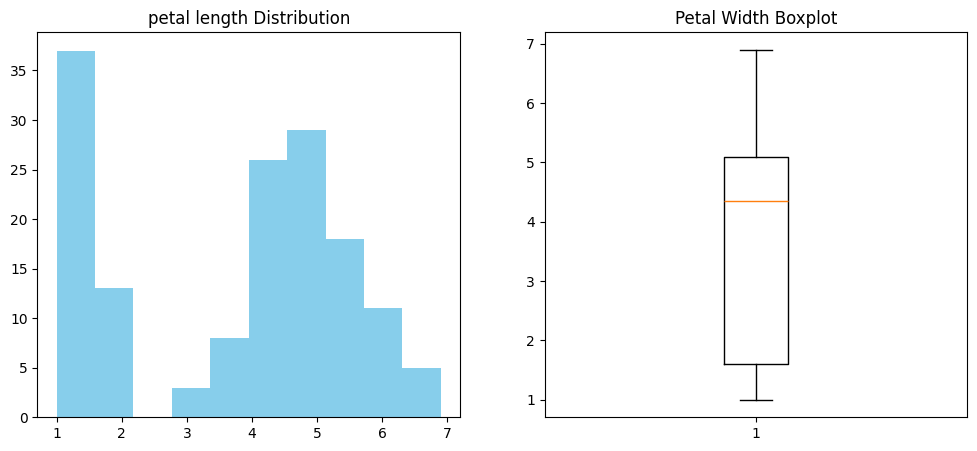

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].hist(iris_data["petal length (cm)"], bins=10, color = 'skyblue')
ax[0].set_title("petal length Distribution")
ax[1].boxplot(iris_data["petal length (cm)"])
ax[1].set_title("Petal Width Boxplot")

In [31]:
species_count = iris_data["species"].value_counts()

In [47]:
species_count.values

array([50, 50, 50])

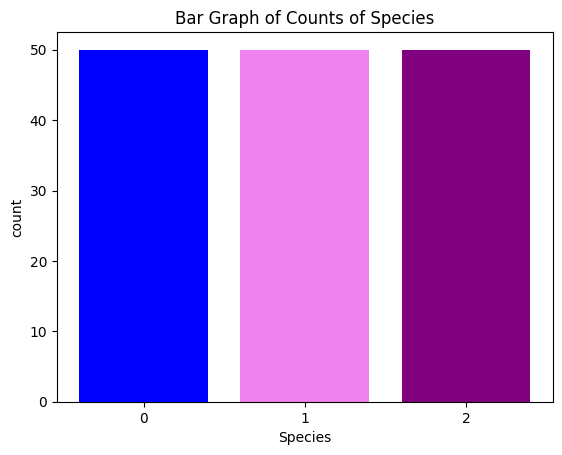

In [48]:
plt.bar(species_count.index.astype(str), species_count.values, color=["blue", "violet", "purple"])
plt.title("Bar Graph of Counts of Species")
plt.xlabel("Species")
plt.ylabel("count")
plt.show()


#EXERCISE
# select stores with 150 and above sales
# add a 10% increase to all sales

In [49]:
sales_data = pd.DataFrame({
    "store": ["A", "B", "C", "D", "E"],
    "sales": [100, 150, 200, 250, 300],
    "date": pd.date_range("2024-01-01", periods=5)
})

sales_spark_df = spark.createDataFrame(sales_data)
sales_spark_df.show(5) 


+-----+-----+-------------------+
|store|sales|               date|
+-----+-----+-------------------+
|    A|  100|2024-01-01 00:00:00|
|    B|  150|2024-01-02 00:00:00|
|    C|  200|2024-01-03 00:00:00|
|    D|  250|2024-01-04 00:00:00|
|    E|  300|2024-01-05 00:00:00|
+-----+-----+-------------------+



In [ ]:
iris_transformed = iris_spark_df.select(col("sepal length (cm)"), col("sepal width (cm)") +1
)

iris_transformed.show(5)

In [50]:
sales_filtered = sales_spark_df.filter(sales_spark_df["sales"] >= 150)
sales_filtered.show()

+-----+-----+-------------------+
|store|sales|               date|
+-----+-----+-------------------+
|    B|  150|2024-01-02 00:00:00|
|    C|  200|2024-01-03 00:00:00|
|    D|  250|2024-01-04 00:00:00|
|    E|  300|2024-01-05 00:00:00|
+-----+-----+-------------------+



In [68]:
sales_transformed = sales_spark_df.select(col("store"), col("sales"), 
                                          round((col("sales") * 1.1),2),
                                          col("date"))
sales_transformed.show()

+-----+-----+-----------------------+-------------------+
|store|sales|round((sales * 1.1), 2)|               date|
+-----+-----+-----------------------+-------------------+
|    A|  100|                  110.0|2024-01-01 00:00:00|
|    B|  150|                  165.0|2024-01-02 00:00:00|
|    C|  200|                  220.0|2024-01-03 00:00:00|
|    D|  250|                  275.0|2024-01-04 00:00:00|
|    E|  300|                  330.0|2024-01-05 00:00:00|
+-----+-----+-----------------------+-------------------+



# EXERCISE
# Create a bar plot showing count of category
# Create a scatter plot of value vs index
# Customise the plots with interesting colours and markers
# Create a bar plot of the total sum of each category

In [73]:
exercise_data = pd.DataFrame({
    "category": ["X", "Y", "X", "Z", "Y"],
    "value": [10, 20, 15, 30, 25]
})



In [75]:
exercise_data

,category,value
0,X,10
1,Y,20
2,X,15
3,Z,30
4,Y,25


In [81]:
cate_counts = exercise_data["category"].value_counts()
cate_counts

category
X    2
Y    2
Z    1
Name: count, dtype: int64

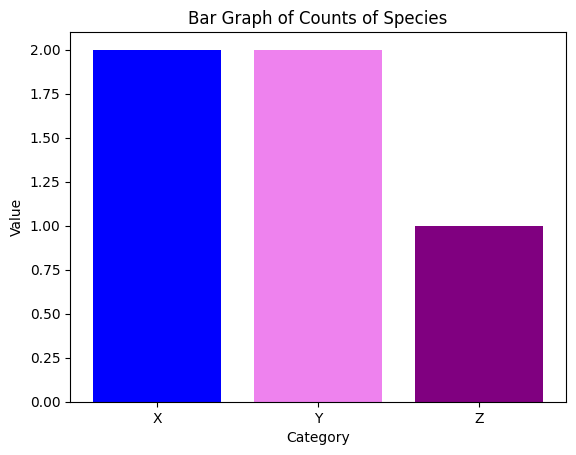

In [83]:
plt.bar(cate_counts.index, cate_counts.values, color=["blue", "violet", "purple"])
plt.title("Bar Graph of Counts of Species")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()

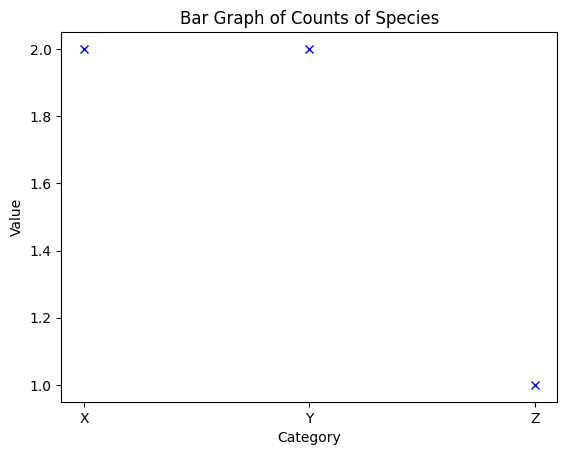

In [85]:
plt.plot(cate_counts.index, cate_counts.values, "bx")
plt.title("Bar Graph of Counts of Species")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()

In [86]:
exercise_data

,category,value
0,X,10
1,Y,20
2,X,15
3,Z,30
4,Y,25


In [97]:
sum_data = exercise_data.groupby("category")["value"].sum()
sum_data

category
X    25
Y    45
Z    30
Name: value, dtype: int64

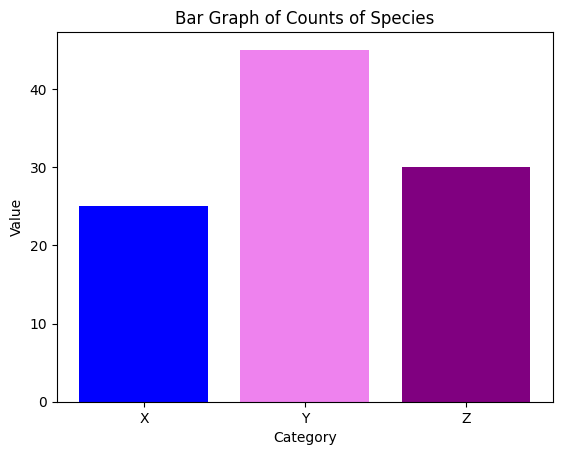

In [96]:
plt.bar(sum_data.index, sum_data.values, color=["blue", "violet", "purple"])
plt.title("Bar Graph of Counts of Species")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()